# Sum of N FM Signals

In [2]:
import numpy as np
import scipy.io.wavfile as sio
import matplotlib.pyplot as plt

## Read message

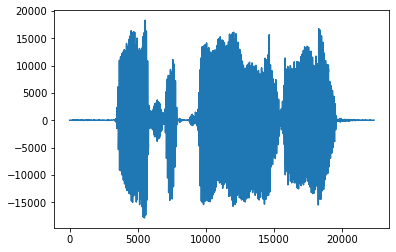

In [3]:
fs_m, m = sio.read('biker.wav')
ts_m = 1/fs_m
plt.plot(m)

## Setup FM signal sampling period

In [4]:
fs_FM = 43500000
ts_FM = 1/fs_FM

## Setup FM signal parameters

In [25]:
A = 1
wc = [87.9*1000000 + 0.2*1000000*i for i in range(101)]
kf = 1

## Upsample m(t) sampled at fs_m to mFM(t) sampled at fs_FM

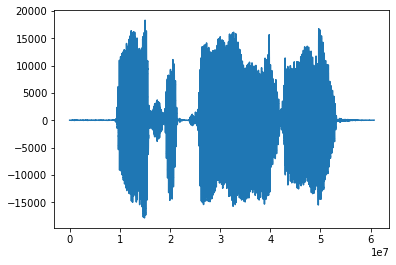

In [17]:
lenmFM = int((len(m)*ts_m)/ts_FM)
mFM = np.zeros(lenmFM,dtype=np.float32)
mFM[0] = m[0]
j = 1
for i in range(1,len(m)):
    while j*ts_FM < i*ts_m:
        mFM[j] = m[i-1]
        j += 1
plt.plot(mFM)

## Integrate mFM(t)

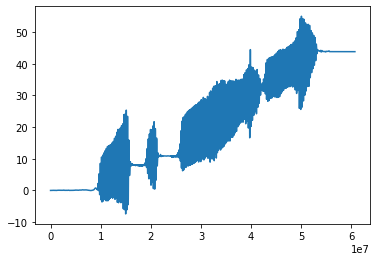

In [21]:
intmFM = np.zeros(lenmFM,dtype=np.float32)
intmFM[0] = mFM[0]*ts_FM
for i in range(1,lenmFM):
    intmFM[i] = intmFM[i-1] + mFM[i]*ts_FM
plt.plot(intmFM)

## Output as wav file

In [23]:
sio.write('bikerint.wav', fs_FM, intmFM)

## Make Single FM waveform

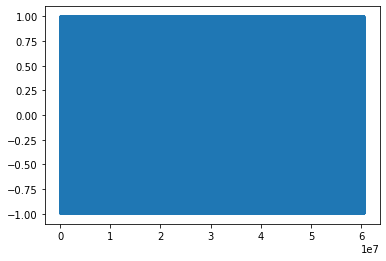

In [26]:
fm = np.zeros(lenmFM,dtype=np.float32)
for i in range(1,lenmFM):
    fm[i] = A * np.cos(wc[0]*i*ts_FM + kf*intmFM[i])
plt.plot(fm)

## Output as wav file

In [27]:
sio.write('bikerFM.wav', fs_FM, fm)

## Make Multiple FM waveform

In [ ]:
fm_multiple = np.zeros(lenmFM,dtype=np.float32)
for i in range(1,lenmFM):
    for freq in wc:
        fm_multiple[i] += A * np.cos(freq*i*ts_FM + kf*intmFM[i])
plt.plot(fm_multiple)